## Building website-specific functionality
The real power of selene comes from using it as a starting framework from which to develop website-specific functionality. 

Here, we illustrate building website specific functionality for the CMA's own website. Selene is intentially not a home for website-specific funcitonality to protect anonymity of the CMA's cases. But selene can be used to develop website-specific page classes elsewhere, as shown below:

In [1]:
from selenium.webdriver.common.by import By
from selene.core.logger import get_logger
from selene.core.selenium.driver import get_driver, stop_driver
from selene.core.selenium.page import PageSelene
from selene.core.selenium.conditions import *

### Defining our new Page objects
The starting point for any scraping in selene is the page object. We define two page objects that inherit the general PageSelene class.

These new objects represent types of page on the site. We attach methods to these new objects to carry out certain tasks on those pages, such as closing cookie banners, clicking icons and retrieving elements of interest.

In [2]:
class PageCmaCaseList(PageSelene):
    """ a class for pages of the form https://www.gov.uk/cma-cases """
    
    def remove_cookies(self, driver):
        """ accept cookie banner """
        
    
    def get_case_links(self):
        """ retrieve the links to any cases listed on a case list page """
        link_elements = self.find_all_soup('a', {'class': 'gem-c-document-list__item-title   govuk-link'})
        links = [x.get('href') for x in link_elements]
        return link_elements
            
    def click_next_page(self, driver):
        """ find the next page button and click on it """
        pass

In [3]:
class PageCmaCase(PageSelene):
    """ a class for the webpage of specific CMA cases, e.g. https://www.gov.uk/cma-cases/vetpartners-limited-slash-goddard-holdco-limited-merger-inquiry """ 
    
    def get_case_name(self, driver):
        """ return the name of the case """
        pass
    
    def get_published_data(self, driver):
        """ return published date for case """
        pass

### Crawling the site using our new objects

In [11]:
driver = get_driver(width=1024, height=768)
logger = get_logger(level='INFO')
url = "http://www.gov.uk/cma-cases"
page = PageCmaCaseList.from_url(driver, url, logger = logger)

2022-05-18 10:57:37 INFO     Logger started
2022-05-18 10:57:47 ERROR    Message: URL is not the expected URL.
; https://www.gov.uk/cma-cases
Traceback (most recent call last):
  File "/home/ubuntu/miniconda/envs/py39/lib/python3.9/site-packages/selene/core/selenium/conditions.py", line 73, in bool_url_expected
    WebDriverWait(driver, wait).until(method=EC.url_to_be(url), message=message)
  File "/home/ubuntu/miniconda/envs/py39/lib/python3.9/site-packages/selenium/webdriver/support/wait.py", line 89, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: URL is not the expected URL.



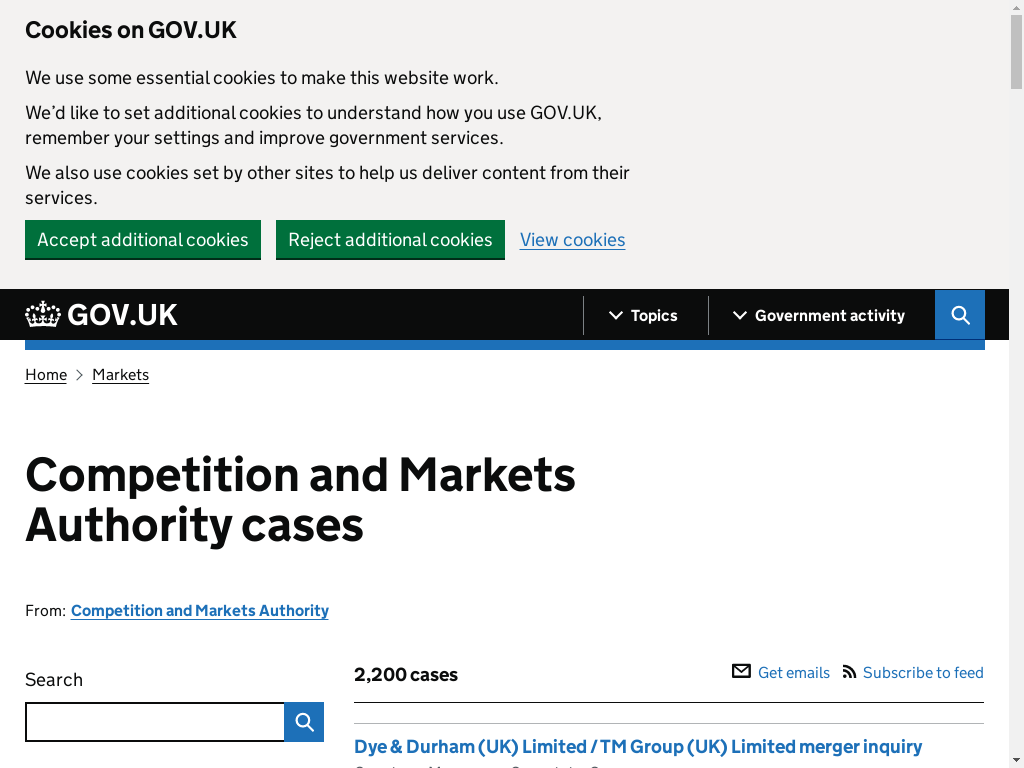

In [12]:
page.screenshot_to_notebook(driver)

In [6]:
case_links = page.get_case_links()

In [7]:
case_links

[]

In [8]:
class PageForm(PageSelene):
    
    def get_table_data(self, driver):
        self.log(f'{self.url}: get_table_data')
        
        values = []
        table = self.find(driver, By.CLASS_NAME, 'table')
        for i, row in enumerate(table.find_all(By.TAG_NAME, 'tr')):
            if i == 0:
                cols = row.find_all(By.TAG_NAME, 'th')
                cols = [col for col in cols if col.text is not None]
                colnames = [col.text.strip().lower().replace(' ', '_') for col in cols]
                continue
            cols = row.find_all(By.TAG_NAME, 'td')
            cols = [col for col in cols if col.text is not None]
            values.append([col.text.strip().lower() for col in cols])
        df = pd.DataFrame(columns=colnames, data=values)
        df['source'] = self.url
        return df

In [9]:
driver = get_driver(width=1024, height=768)
logger = get_logger(level='DEBUG')

2022-05-16 13:46:26 INFO     Logger started


In [10]:
urls = [f'https://www.scrapethissite.com/pages/forms/?page_num={i}' for i in range(1, 11, 1)]
urls

['https://www.scrapethissite.com/pages/forms/?page_num=1',
 'https://www.scrapethissite.com/pages/forms/?page_num=2',
 'https://www.scrapethissite.com/pages/forms/?page_num=3',
 'https://www.scrapethissite.com/pages/forms/?page_num=4',
 'https://www.scrapethissite.com/pages/forms/?page_num=5',
 'https://www.scrapethissite.com/pages/forms/?page_num=6',
 'https://www.scrapethissite.com/pages/forms/?page_num=7',
 'https://www.scrapethissite.com/pages/forms/?page_num=8',
 'https://www.scrapethissite.com/pages/forms/?page_num=9',
 'https://www.scrapethissite.com/pages/forms/?page_num=10']

In [11]:
%%time
df = pd.DataFrame()
for i, url in enumerate(urls):
    page = PageForm.from_url(driver, url, logger=logger)
    df = df.append(page.get_table_data(driver))
    page.screenshot_to_notebook(driver)

NameError: name 'pd' is not defined

In [ ]:
stop_driver(driver)